<center>
    <h1> Sample Complexity of Sinkhorn divergences  </h1>
    <br> <h2> Computational Optimal Transport </h2>
</center>

## Teacher : Gabriel Peyré
## Student : Simon Queric

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import time
from utils import *

## Regularized OT 

In [51]:
d = 5
ma = np.random.uniform(-1, 1, size=d)
mb = np.random.uniform(-1, 1, size=d)
Sa = np.random.normal(0, 0.5, size=(d, d))
Sa = Sa.T@Sa
Sb = np.random.normal(0, 0.5, size=(d, d))
Sb = Sb.T@Sb

In [52]:
epsilons = [10**i for i in range(-6, 3)]
N = [10, 50, 100, 200]

In [53]:
oteps = np.array([ot_gaussian_regularized(ma, mb, Sa, Sb, eps=eps) for eps in epsilons])
OT = ot_gauss(ma, mb, Sa, Sb)

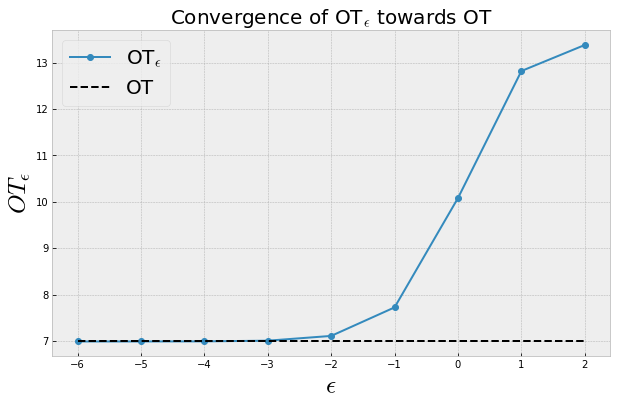

In [54]:
plt.style.use('bmh')
fig=plt.figure(figsize=(10, 6))
plt.plot(np.log10(epsilons), oteps, marker="o")
plt.hlines(OT, -6, 2, color="k", ls="--")
plt.xlabel("$\epsilon$", fontsize=25)
plt.ylabel("$OT_{\epsilon}$", fontsize=25)
plt.title("Convergence of OT$_\epsilon$ towards OT", fontsize=20)
plt.legend(["OT$_\epsilon$", "OT"], fontsize=20)
plt.savefig("regularized.png")
plt.show()

## Sample complexity for gaussians, dimension 3

In [55]:
eps=1
ot_gaussian_regularized(ma, mb, Sa, Sb, eps=1)

10.081412426326484

In [56]:
def gen_data_gaussian(ma, mb, Sa, Sb, n):
    x = np.random.multivariate_normal(ma, Sa, size=n)
    y = np.random.multivariate_normal(mb, Sb, size=n)
    return x, y

In [57]:
C = distmat(x.T, y.T)
C.shape

(20, 20)

In [58]:
Sb

array([[ 0.46657354, -0.20563459, -0.26137751, -0.37435395, -0.15374751],
       [-0.20563459,  0.74232519,  0.33281939,  0.28800106, -0.51502069],
       [-0.26137751,  0.33281939,  0.63143585,  0.38217849,  0.52245277],
       [-0.37435395,  0.28800106,  0.38217849,  0.52966446,  0.56539939],
       [-0.15374751, -0.51502069,  0.52245277,  0.56539939,  2.28792165]])

In [63]:
x, y = gen_data_gaussian(ma, mb, Sa, Sb, 20)

In [64]:
x.shape

(20, 5)

In [65]:
approx_wasserstein(x, y, eps=1)

9.598373845817813

In [71]:
start = time.time()
for eps in [100, 10, 1, 1e-1, 1e-2] :
    sample_complexity = np.zeros((len(N), 200))
    for i in range(len(N)) :
        for j in range(200):
            x, y = gen_data_gaussian(ma, mb, Sa, Sb, n=N[i])
            sample_complexity[i,  j] =  approx_wasserstein(x, y, eps=eps)
    np.savetxt("courbe_d=3_eps="+str(eps)+".txt", sample_complexity.flatten())
end = time.time()

In [72]:
print("Running Time : {:.2f} min".format((end-start)/60))

Running Time : 9.99 min


In [73]:
def plot(T, X, alpha=0.2):
    Xmean = X.mean(axis=1)
    Xstd = X.std(axis=1)
    plt.plot(T, Xmean)
    plt.fill_between(T, Xmean-Xstd, Xmean+Xstd, alpha=alpha, label='_nolegend_')

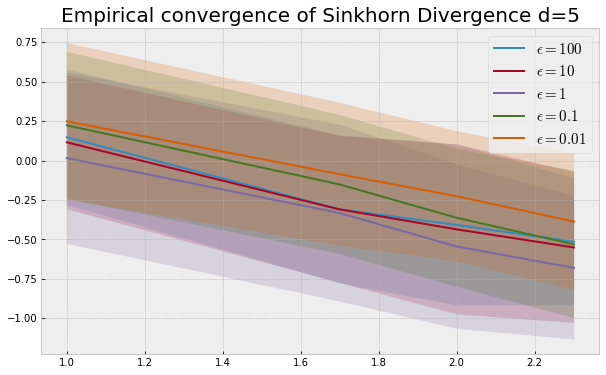

In [77]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 0.1, 0.01]
legend = []
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    L = np.loadtxt("courbe_d=3_eps="+str(ep)+".txt")
    L = L.reshape((4, 200))
    OTeps = ot_gaussian_regularized(ma, mb, Sa, Sb, ep)
    plot(np.log10(N), np.log10(np.abs(L-OTeps)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("Empirical convergence of Sinkhorn Divergence d=5", fontsize=20)
plt.savefig("2sinkhorn_log_convergence_d=5.png")
plt.show()

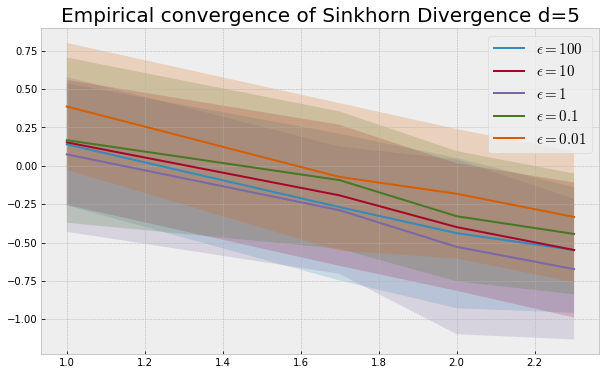

In [70]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 0.1, 0.01]
legend = []
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    L = np.loadtxt("courbe_d=3_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    OTeps = ot_gaussian_regularized(ma, mb, Sa, Sb, ep)
    plot(np.log10(N), np.log10(np.abs(L-OTeps)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("Empirical convergence of Sinkhorn Divergence d=5", fontsize=20)
plt.savefig("sinkhorn_log_convergence_d=5.png")
plt.show()

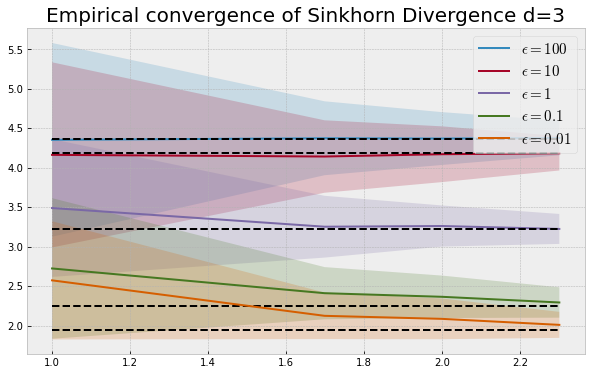

In [446]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 0.1, 0.01]
legend = []
fig=plt.figure(figsize=(10, 6))
for ep in epsilons[:] : 
    L = np.loadtxt("courbe_d=3_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    plot(np.log10(N), L)
    OTeps = ot_gaussian_regularized(ma, mb, Sa, Sb, ep)
    plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("Empirical convergence of Sinkhorn Divergence d=3", fontsize=20)
plt.savefig("sinkhorn_convergence_d=3.png")
plt.show()

## Sample complexity for gaussians, dimension 5

In [448]:
OTeps = ot_gaussian_regularized(ma, mb, Sa, Sb, 100)

In [449]:
d = 5
ma = np.zeros(d)
Sa = np.eye(d)

In [450]:
start = time.time()
sample_complexity = np.zeros((len(N), 100))
for eps in [100, 10, 1, 1e-1, 1e-2] :
    for i in range(len(N)) :
        for j in range(100):
            x, y = gen_data_gaussian(ma=ma, mb=ma, Sa=Sa, Sb=Sa, n=N[i])
            sample_complexity[i,  j] = approx_normalized_wasserstein(x, y, eps=eps)
    np.savetxt("sample_complexity_gaussian_d=5_eps="+str(eps)+".txt", sample_complexity.flatten())
end = time.time()

In [451]:
print("Running Time : {:.2f} min".format((end-start)/60))

Running Time : 16.05 min


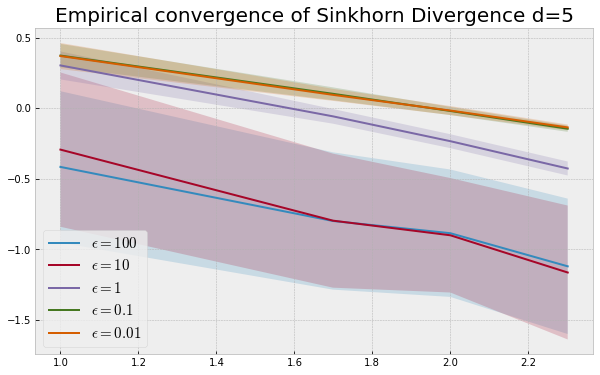

In [455]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 0.1, 0.01]
legend = []
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    L = np.loadtxt("sample_complexity_gaussian_d=5_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    #OTeps = ot_gaussian_regularized(ma, mb, Sa, Sb, ep)
    plot(np.log10(N), np.log10(np.abs(L)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("Empirical convergence of Sinkhorn Divergence d=5", fontsize=20)
plt.savefig("sinkhorn_log_convergence_d=5.png")
plt.show()

## Sample complexity for Beta distribution

In [30]:
def gen_data_beta(a, b, n, d):
    x = np.random.beta(a, b, size=(n, d))
    return x

In [27]:
x = gen_data_beta(a=2, b=5, n=1000)

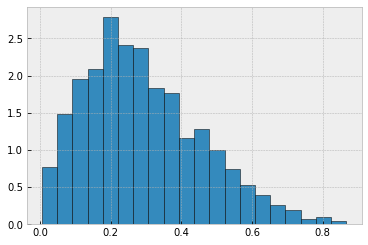

In [28]:
plt.hist(x, bins="auto", density=1, edgecolor="k")
plt.show()

In [29]:
x = gen_data_beta(a=2, b=5, n=100)
y = gen_data_beta(a=2, b=5, n=100)


In [ ]:
approx_normalized_wasserstein(x, y, n=1, eps=1e-1)

In [8]:
C = distmat(x.T, y.T)

In [9]:
C.shape

(1000, 1000)

In [31]:
start = time.time()
sample_complexity = np.zeros((len(N), 100))
for eps in [100, 10, 1, 1e-1, 1e-2] :
    for i in range(len(N)) :
        for j in range(100):
            x = gen_data_beta(a=2, b=5, n=N[i], d=2)
            y = gen_data_beta(a=2, b=5, n=N[i], d=2)
            sample_complexity[i,  j] = approx_normalized_wasserstein(x, y, n=N[i], eps=eps)
    np.savetxt("sample_complexity_beta_eps="+str(eps)+".txt", sample_complexity.flatten())
end = time.time()

In [32]:
print("Running Time : {:.2f} min".format((end-start)/60))

Running Time : 11.50 min


In [33]:
def plot(T, X, alpha=0.2):
    Xmean = X.mean(axis=1)
    Xstd = X.std(axis=1)
    plt.plot(T, Xmean)
    plt.fill_between(T, Xmean-Xstd, Xmean+Xstd, alpha=alpha, label='_nolegend_')

100
10
1
0.1
0.01


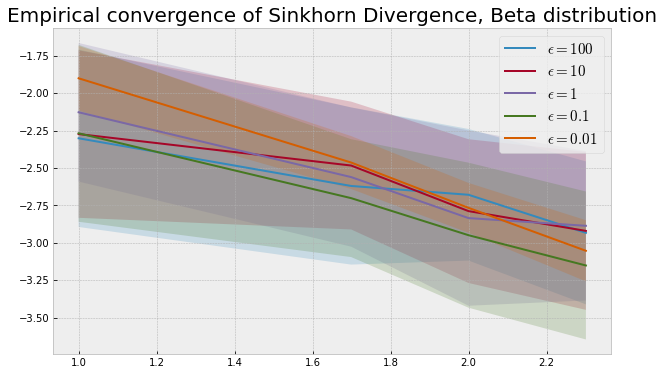

In [35]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 1e-1, 1e-2]
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    print(ep)
    L = np.loadtxt("sample_complexity_beta_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    plot(np.log10(N), np.log10(np.abs(L)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("Empirical convergence of Sinkhorn Divergence, Beta distribution", fontsize=20)
plt.savefig("sinkhorn_log_convergence_beta.png")
plt.show()

In [123]:
L = np.loadtxt("sample_complexity_beta_eps="+str(eps)+".txt")
L = L.reshape((4, 100))

## Sample complexity for uniform distribution

In [19]:
def gen_data_uniform(d, n):
    x = np.random.uniform(-1, 1, size=(n, d))
    return x

In [20]:
x = gen_data_uniform(d=3, n=10)
y = gen_data_uniform(d=3, n=10)
eps = 100
test = approx_normalized_wasserstein(x, y, n=10, eps=100)

In [21]:
x.shape

(10, 3)

In [22]:
test

-0.13554350202935694

In [13]:
start = time.time()
sample_complexity = np.zeros((len(N), 100))
for eps in [100, 10, 1, 1e-1, 1e-2] :
    for i in range(len(N)) :
        for j in range(100):
            x = gen_data_uniform(d=3, n=N[i])
            y = gen_data_uniform(d=3, n=N[i])
            sample_complexity[i,  j] = approx_normalized_wasserstein(x, y, n=N[i], eps=eps)
    np.savetxt("sample_complexity_uniform_eps="+str(eps)+".txt", sample_complexity.flatten())
end = time.time()

In [17]:
print("Running Time : {:.2f} min".format((end-start)/60))

Running Time : 11.42 min


In [25]:
print("Running Time : {:.2f} min".format((end-start)/60))

Running Time : 11.11 min


100
10
1
0.1
0.01


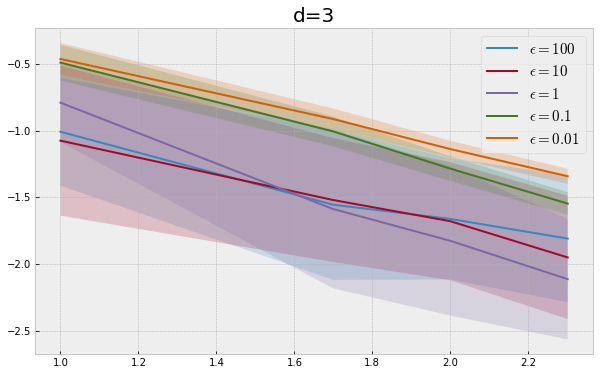

In [38]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 1e-1, 1e-2]
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    print(ep)
    L = np.loadtxt("sample_complexity_uniform_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    plot(np.log10(N), np.log10(np.abs(L)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("d=3", fontsize=20)
plt.savefig("sinkhorn_log_convergence_uniform.png")
plt.show()

In [23]:
start = time.time()
sample_complexity = np.zeros((len(N), 100))
for eps in [100, 10, 1, 1e-1, 1e-2] :
    for i in range(len(N)) :
        for j in range(100):
            x = gen_data_uniform(d=1, n=N[i])
            y = gen_data_uniform(d=1, n=N[i])
            sample_complexity[i,  j] = approx_normalized_wasserstein(x, y, n=N[i], eps=eps)
    np.savetxt("sample_complexity_uniform_d=1_eps="+str(eps)+".txt", sample_complexity.flatten())
end = time.time()

100
10
1
0.1
0.01


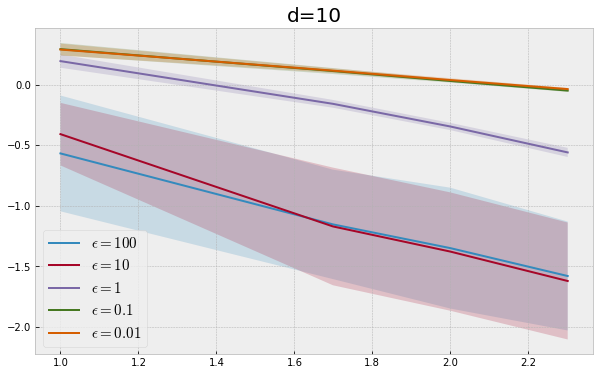

In [37]:
plt.style.use('bmh')
epsilons = [100, 10, 1, 1e-1, 1e-2]
fig=plt.figure(figsize=(10, 6))
for ep in epsilons : 
    print(ep)
    L = np.loadtxt("sample_complexity_uniform_d=10_eps="+str(ep)+".txt")
    L = L.reshape((4, 100))
    plot(np.log10(N), np.log10(np.abs(L)))
    
    #plt.hlines(OTeps, 1, 2.3, color="k", ls="--", label='_nolegend_')
    
plt.legend(["$\epsilon = 100$", "$\epsilon = 10$", "$\epsilon = 1$",  "$\epsilon = 0.1$", "$\epsilon = 0.01$"], fontsize=15)
plt.title("d=10", fontsize=20)
plt.savefig("sinkhorn_log_convergence_uniform_d=10.png")
plt.show()